<a href="https://colab.research.google.com/github/jiayuankeliang/309CourseWork2/blob/main/309CourseWork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Firstly, you must ensure your location is in the same level as 'data' floder

In [4]:
%cd /content/drive/MyDrive/Github/309CourseWork2

/content/drive/MyDrive/Github/309CourseWork2


import moudle

In [5]:
import os
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from concurrent.futures import ThreadPoolExecutor,as_completed

load meat data

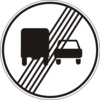

In [6]:
meta = {}
for file_name in os.listdir('/content/drive/MyDrive/Github/309CourseWork2/data/meta'):
  key = file_name.replace('.png', '')
  meta[int(key)] = Image.open(os.path.join('/content/drive/MyDrive/Github/309CourseWork2/data/meta', file_name))

meta[42]

load train data from .npy file and check shape(save train data as .npy files in personal computer)

In [7]:
X_train = np.load('/content/drive/MyDrive/Github/309CourseWork2/data/X_train.npy')
Y_train = np.load('/content/drive/MyDrive/Github/309CourseWork2/data/Y_train.npy')
X_train = X_train/255
X_train.shape, Y_train.shape

((39209, 32, 32, 3), (39209,))

show train image

label and sample


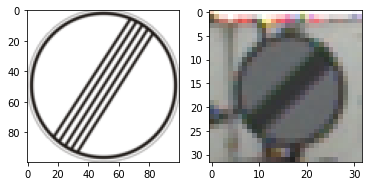

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
index = 39208
print('label and sample')
ax1.imshow(meta[Y_train[index]])
ax2.imshow(X_train[index])

load test data from .npy file and check shape(save test data as .npy files in personal computer)

In [9]:
X_test = np.load('/content/drive/MyDrive/Github/309CourseWork2/data/X_test.npy')
Y_test = np.load('/content/drive/MyDrive/Github/309CourseWork2/data/Y_test.npy')
X_test = X_test/255
X_test.shape, Y_test.shape

((12630, 32, 32, 3), (12630,))

show test image

label and sample


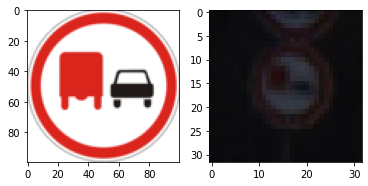

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
index = 12629
print('label and sample')
ax1.imshow(meta[Y_test[index]])
ax2.imshow(X_test[index])

check GPU available

In [11]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


start with a simple model

In [12]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(43, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics = ["accuracy"])
history = model.fit(X_train, Y_train, epochs = 100, validation_split=0.1, callbacks=[early_stopping_cb])
model.evaluate(X_test, Y_test)

Epoch 1/100
1103/1103 [==============================] - 9s 4ms/step - loss: 2.5417 - accuracy: 0.3717 - val_loss: 9.1520 - val_accuracy: 0.0023
Epoch 2/100
1103/1103 [==============================] - 5s 5ms/step - loss: 1.4199 - accuracy: 0.6383 - val_loss: 12.4028 - val_accuracy: 0.0893
Epoch 3/100
1103/1103 [==============================] - 4s 4ms/step - loss: 0.9417 - accuracy: 0.7696 - val_loss: 14.8966 - val_accuracy: 0.0903
Epoch 4/100
1103/1103 [==============================] - 4s 4ms/step - loss: 0.7040 - accuracy: 0.8277 - val_loss: 16.9409 - val_accuracy: 0.1079
Epoch 5/100
1103/1103 [==============================] - 5s 4ms/step - loss: 0.5779 - accuracy: 0.8592 - val_loss: 18.5546 - val_accuracy: 0.1571
Epoch 6/100
1103/1103 [==============================] - 4s 4ms/step - loss: 0.5003 - accuracy: 0.8794 - val_loss: 20.1038 - val_accuracy: 0.1520
Epoch 7/100
1103/1103 [==============================] - 4s 4ms/step - loss: 0.4308 - accuracy: 0.8975 - val_loss: 20.9371 - 

[2.4992587566375732, 0.4163895547389984]

train acc/loss and val acc/loss

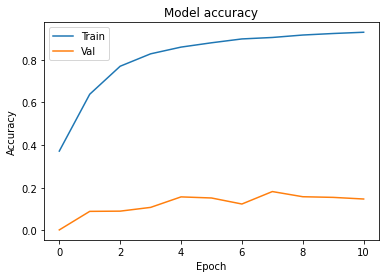

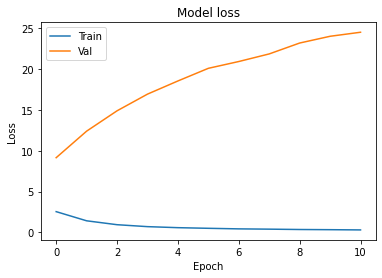

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

overfitting